# Spikewarp

author: steeve.laquitaine@epfl.ch 

**method**:

* 1 hour evoked simulation (SpikingBias paper)
* we took the first `10 minutes`
* delta_time: 1.3 ms
* 2X (all scores were way too low -> need check so for now 1X)

### Setup

setup spikeinterf... env


In [1]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

# set project path
proj_path = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(proj_path)

from src.nodes import utils
from src.nodes.utils import get_config
import spikeinterface as si
from src.nodes.metrics.quality import get_scores

# DATASETS

# NPX PROBE
# Synthetic (10m)
cfg, _ = get_config("silico_neuropixels", "stimulus").values()
GT = cfg["sorting"]["simulation"]["ground_truth"]["output"]
GT_10m = cfg["sorting"]["simulation"]["ground_truth"]["10m"]["output"]
KS4 = cfg["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3 = cfg["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5 = cfg["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2 = cfg["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS = cfg["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS = cfg["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]

DELTA_TIME = 1.3

quality_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/analysis/sorting_quality/sorting_quality.csv"
score_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/postprocessing/biophy/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/sorted/scores/"

2024-09-25 15:58:16,347 - root - utils.py - get_config - INFO - Reading experiment config.
2024-09-25 15:58:16,506 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Ground truth

* get first 10 minutes

In [2]:
# get ten first minutes
SortingTrue = si.load_extractor(GT)
SortingTrue = SortingTrue.frame_slice(
    start_frame=0, end_frame=10 * 60 * SortingTrue.sampling_frequency
)
SortingTrue.save(folder=GT_10m, n_jobs=-1, total_memory="2G", overwrite=True)
SortingTrue = si.load_extractor(GT_10m)

### Check metadata exist

In [3]:
# unit-test
assert (
    si.load_extractor(KS4).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS3).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS2_5).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS2).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(HS).get_property("layer") is None
) == False, "run postprocessing"

### Agreement scores

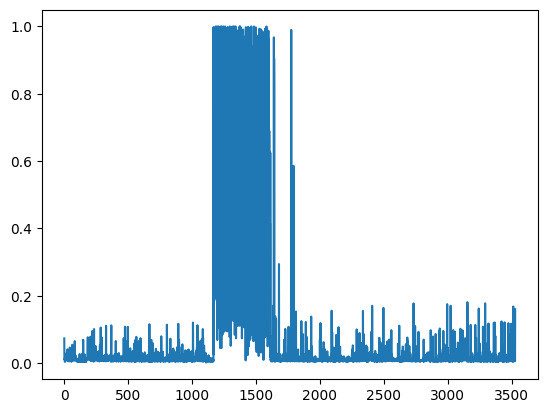

In [4]:
SAVE = True

## KS4
Sorting = si.load_extractor(KS4)
scores4 = get_scores(SortingTrue, Sorting, DELTA_TIME)
# KS3
Sorting = si.load_extractor(KS3)
scores3 = get_scores(SortingTrue, Sorting, DELTA_TIME)
# KS2.5
Sorting = si.load_extractor(KS2_5)
scores25 = get_scores(SortingTrue, Sorting, DELTA_TIME)
# KS2
Sorting = si.load_extractor(KS2)
scores2 = get_scores(SortingTrue, Sorting, DELTA_TIME)
# KS
Sorting = si.load_extractor(KS)
scores1 = get_scores(SortingTrue, Sorting, DELTA_TIME)
# HS
Sorting = si.load_extractor(HS)
scoresH = get_scores(SortingTrue, Sorting, DELTA_TIME)

# save
utils.create_if_not_exists(score_path)
if SAVE:
    scores4.to_csv(score_path + "ks4.csv", index=True)
    scores3.to_csv(score_path + "ks3.csv", index=True)
    scores25.to_csv(score_path + "ks25.csv", index=True)
    scores2.to_csv(score_path + "ks2.csv", index=True)
    scores1.to_csv(score_path + "ks.csv", index=True)
    scoresH.to_csv(score_path + "hs.csv", index=True)

# plot
plt.plot(scores4.max())

In [6]:
pd.read_csv(score_path + "ks4.csv")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528
0,12165,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,15894,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,16652,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.0,0.000523,0.000000
3,17923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,18371,0.001947,0.001736,0.003268,0.003448,0.000000,0.0,0.000000,0.000000,0.003968,...,0.000000,0.000951,0.001501,0.004728,0.000000,0.001499,0.003509,0.0,0.000000,0.001196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,4223302,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000528,0.000000,0.000000,0.000000,0.000263,0.001543,0.0,0.000000,0.000000
1832,4225319,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1833,4228700,0.005501,0.002185,0.000905,0.000000,0.001768,0.0,0.000939,0.000907,0.000767,...,0.000889,0.003455,0.005232,0.000818,0.002888,0.003548,0.003027,0.0,0.001715,0.004636
1834,4229218,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


### Sorted unit evaluation

* load from "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/analysis/sorting_quality/sorting_quality.csv"

In [8]:
quality_df = pd.read_csv(
    "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/analysis/sorting_quality/sorting_quality.csv"
)

# report
display("Sorted unit classification table:\n")
display(quality_df)
print("Tested spike sorters:", quality_df["sorter"].unique())

'Sorted unit classification table:\n'

,sorted,quality,layer,sorter,experiment,Depth
0,239,false positive,L6,KS2.5,DS,3.0
1,739,false positive,L2/3,KS,DS,1.0
2,854,false positive,L5,KS2,E,NaN
3,724,false positive,L2/3,KS,DS,1.0
4,569,false positive,L6,KS,DS,3.0
...,...,...,...,...,...,...
16480,400,oversplitter,L2/3,KS,DS,1.0
16481,979,oversplitter,L6,KS,DS,3.0
16482,137,oversplitter,L5,KS2,DS,2.0
16483,1774,oversplitter,L5,KS,E,NaN


Tested spike sorters: ['KS2.5' 'KS' 'KS2' 'KS3' 'HS' 'KS4']


In [10]:
# quick sanity check: proportion of high-quality single-units
# ks3
good_ks3 = quality_df.loc[(quality_df.sorter == "KS3"), "quality"].str.contains("good")
print(sum(good_ks3) / len(good_ks3))
# ks2
good_ks2 = quality_df.loc[(quality_df.sorter == "KS2"), "quality"].str.contains("good")
print(sum(good_ks2) / len(good_ks2))

0.30060422960725075
0.1592128801431127
